In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from src.datamodule.av2_dataset import Av2Dataset
from src.datamodule.av2_extractor import Av2Extractor
from src.datamodule.av2_dataset import collate_fn
from av2.datasets.motion_forecasting import scenario_serialization
from av2.map.map_api import ArgoverseStaticMap
from src.model.trainer_mae import Trainer as Model

data_root = Path("/home/jcheng/dataset/av2/val") # Path to the datase
ckpt = "./checkpoints/mae_pretrain.ckpt"
dataset = Av2Dataset(data_root=data_root, extractor=Av2Extractor(radius=150))
model = Model.load_from_checkpoint(ckpt)
model = model.eval()

2023-12-19 11:03:03.196932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 11:03:03.278138: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 11:03:03.636180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jcheng/miniconda3/envs/av2_old/lib/python3.8/site-packages/cv2/../../lib64::/home/jcheng/res

Extracting data from /home/jcheng/dataset/av2/val
data root: /home/jcheng/dataset/av2/val/None, total number of files: 24988


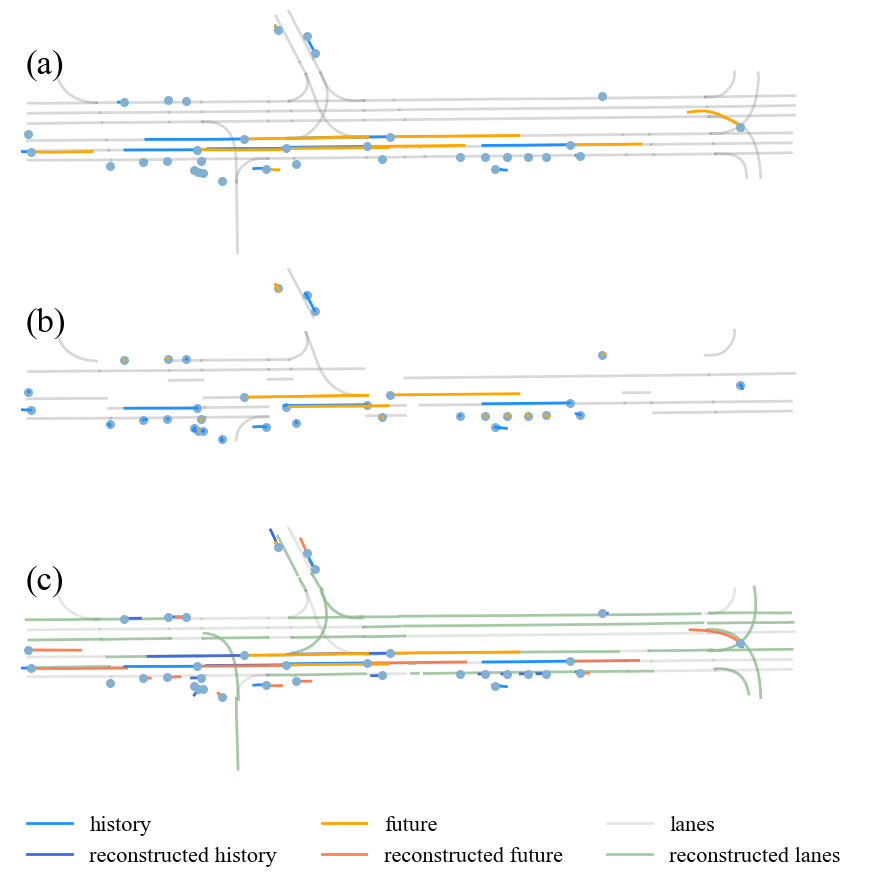

In [3]:
from src.utils.vis_mae import plot_reconstruction

data = dataset[0]
scene_id = data["scenario_id"]
scene_file = data_root / scene_id / ("scenario_" + scene_id + ".parquet")
map_file = data_root / scene_id / ("log_map_archive_" + scene_id + ".json")
scenario = scenario_serialization.load_argoverse_scenario_parquet(scene_file)
static_map = ArgoverseStaticMap.from_json(map_file)

batch = collate_fn([data])
out = model(batch)
plot_reconstruction(batch, out)